In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-dblp/dblp.csv


In [3]:
df = pd.read_csv('/kaggle/input/my-dblp/dblp.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,venue_name,venue_type,doi,keyword,volume,issue,publisher,weight,indexed_keyword,inverted_index
0,1091,Preliminary Design of a Network Protocol Learn...,2013.0,Makoto Satoh;Ryo Muramatsu;Mizue Kayama;Kazuno...,Shinshu University;Shinshu University;Shinshu ...,2312688602;2482909946;2128134587;2101782692;21...,1.0,Conference,2.0,2005687710;2018037215,...,International Conference on Human-Computer Int...,C,https://doi.org/10.1007/978-3-642-39476-8_19,Telecommunications network;Computer science;Mi...,NaN,NaN,"Springer, Berlin, Heidelberg",0.45139;0.45245;0.5347;0.47011;0.46629;0.49737...,tool.;study;aim;purpose;scientific;for;aspects...,"[42];[4];[37];[1];[17];[11];[18];[14, 46];[27]..."
1,1388,Further Results on Independence in Direct-Prod...,2000.0,NaN,NaN,NaN,1.0,Journal,NaN,NaN,...,Ars Combinatoria,J,NaN,Graph;Discrete mathematics;Combinatorics;Direc...,56.0,NaN,NaN,0.0;0.45872;0.4515;0.59104;0.42784,NaN,NaN
2,1674,A methodology for the physically accurate visu...,2011.0,G. Beale;G. Earl,"Archaeological Computing Research Group, Unive...",2103626414;2117665592,1.0,Conference,15.0,1535888970;1992876689;1993710814;2035653341;20...,...,International Conference on Virtual Reality,C,https://doi.org/10.2312/VAST/VAST11/137-144,Statue;Engineering drawing;Virtual reconstruct...,NaN,NaN,Eurographics Association,0.40216;0.43427;0.0;0.42062;0.4595;0.4474;0.40496,illustrating;accurate;objects;accuracy;collect...,"[59];[43, 108];[112];[89];[154];[30];[33];[119..."
3,1688,"Comparison of GARCH, Neural Network and Suppor...",2009.0,Altaf Hossain;Faisal Zaman;M. Nasser;M. Mufakh...,"Department of Statistics , Rajshahi University...",2300589394;2308774408;2126056503;2425818370,6.0,Conference,3.0,1560724230;1986968751;2156909104,...,Pattern Recognition and Machine Intelligence,C,https://doi.org/10.1007/978-3-642-11164-8_97,Autoregressive–moving-average model;Computer s...,NaN,NaN,"Springer, Berlin, Heidelberg",0.49811;0.41114;0.51884;0.0;0.0;0.0;0.49542;0....,standard;compare;superiority;indices.;applied;...,"[14, 53];[11];[44];[63];[2];[40];[17, 46];[25]..."
4,5411,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,2009.0,nan;nan;nan;nan,nan;nan;nan;nan,nan;nan;nan;nan,NaN,Conference,NaN,NaN,...,International Conference on Computer Graphics ...,C,NaN,Computer vision;Polygon mesh;Computer graphics...,NaN,NaN,NaN,0.44692;0.53319;0.46151;0.42074;0.0;0.61991,NaN,NaN


In [4]:
df.columns

Index(['id', 'title', 'year', 'author_name', 'author_org', 'author_id',
       'n_citation', 'doc_type', 'reference_count', 'references', 'venue_id',
       'venue_name', 'venue_type', 'doi', 'keyword', 'volume', 'issue',
       'publisher', 'weight', 'indexed_keyword', 'inverted_index'],
      dtype='object')

In [19]:
yearly_pub_counts = df['year'].value_counts().sort_index()

# Convert to DataFrame for easier manipulation
yearly_df = pd.DataFrame({'year': yearly_pub_counts.index, 'publications': yearly_pub_counts.values})

In [20]:
# keep only 
yearly_df = yearly_df[yearly_df['year'] > 2000]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


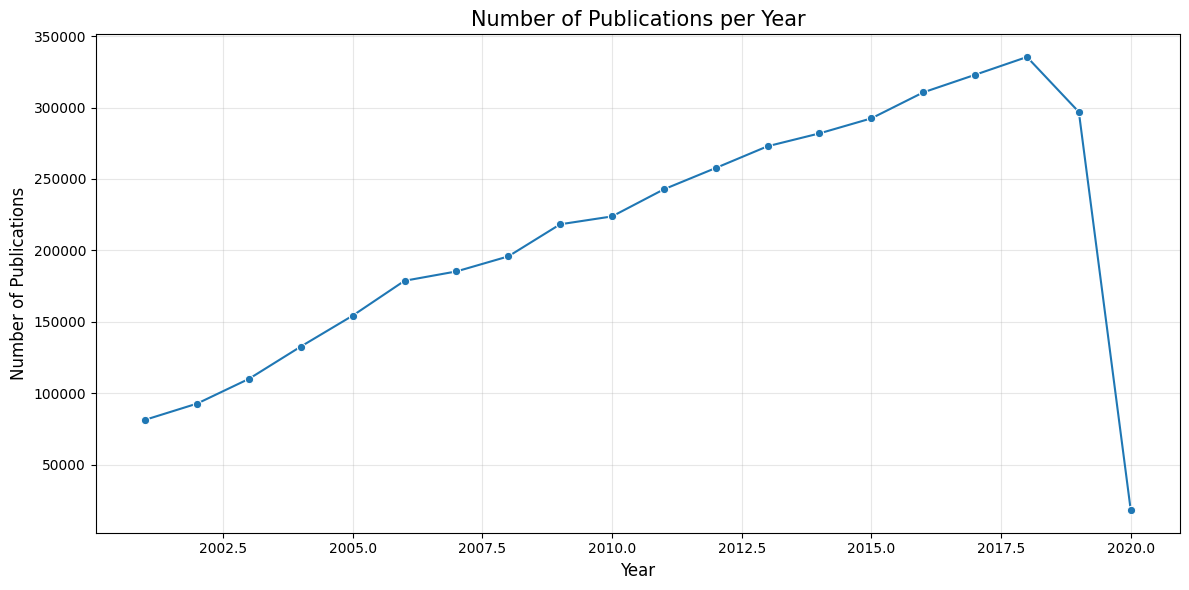

In [21]:
# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='publications', data=yearly_df, marker='o')
plt.title('Number of Publications per Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


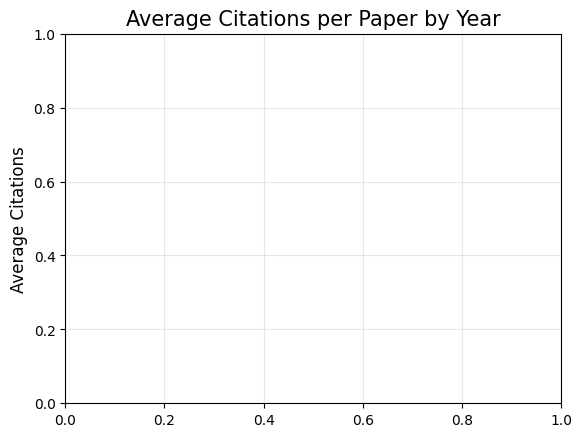

In [26]:
yearly_citations = df.groupby('year')['n_citation'].agg(['mean', 'median', 'sum']).reset_index()
yearly_citations.columns = ['year', 'avg_citations', 'median_citations', 'total_citations']

# Visualization of citation trends

# Average citations per paper by year
sns.lineplot(x='year', y='avg_citations', data=yearly_citations, marker='o', ax=axes[0])
plt.title('Average Citations per Paper by Year', fontsize=15)
plt.ylabel('Average Citations', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

In [30]:
df = df[df['year']> 2010]

In [39]:
def extract_keywords(row):
    keywords = []
    if pd.notna(row['keyword']) and isinstance(row['keyword'], str):
        keywords = [k.strip() for k in row['keyword'].split(';')]
    return keywords

# Apply function to extract keywords
df['extracted_keywords'] = df.apply(extract_keywords, axis=1)

In [40]:
# Flatten the list of keywords and count occurrences
all_keywords = []
for keywords in df['extracted_keywords']:
    all_keywords.extend(keywords)

keyword_counts = pd.Series(all_keywords).value_counts()

# Get top keywords (these will be our main subfields)
top_keywords = keyword_counts.head(20).index.tolist()

print(top_keywords)

['Computer science', 'Artificial intelligence', 'Mathematics', 'Machine learning', 'Computer vision', 'Mathematical optimization', 'Computer network', 'Pattern recognition', 'Engineering', 'Distributed computing', 'Data mining', 'Control theory', 'Real-time computing', 'Algorithm', 'Discrete mathematics', 'Electronic engineering', 'Theoretical computer science', 'Knowledge management', 'Combinatorics', 'Computer security']


In [41]:
# Create a flag for each top keyword/subfield
for keyword in top_keywords:
    col_name = f'has_{keyword.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "")}'
    df[col_name] = df['extracted_keywords'].apply(lambda x: keyword in x)


In [43]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,has_Data_mining,has_Control_theory,has_Real_time_computing,has_Algorithm,has_Discrete_mathematics,has_Electronic_engineering,has_Theoretical_computer_science,has_Knowledge_management,has_Combinatorics,has_Computer_security
0,1091,Preliminary Design of a Network Protocol Learn...,2013.0,Makoto Satoh;Ryo Muramatsu;Mizue Kayama;Kazuno...,Shinshu University;Shinshu University;Shinshu ...,2312688602;2482909946;2128134587;2101782692;21...,1.0,Conference,2.0,2005687710;2018037215,...,False,False,False,False,False,False,False,False,False,False
2,1674,A methodology for the physically accurate visu...,2011.0,G. Beale;G. Earl,"Archaeological Computing Research Group, Unive...",2103626414;2117665592,1.0,Conference,15.0,1535888970;1992876689;1993710814;2035653341;20...,...,False,False,False,False,False,False,False,False,False,False
6,6522,Improved Secret Image Sharing Method By Encodi...,2011.0,Güzin Ulutas;Mustafa Ulutas;Vasif V. Nabiyev,Karadeniz Technical Univ.;Karadeniz Technical ...,2022192081;2023460672;2174205032,NaN,Conference,4.0,2007942710;2040446335;2042901705;2138296484,...,False,False,False,False,False,False,True,False,False,False
8,8373,Formal agent-oriented ubiquitous computing: a ...,2012.0,Phan Cong Vinh,"Department of IT, NTT University, HCM City, Vi...",2611851107,NaN,Conference,5.0,141500162;1977736041;2057072261;2495388083;261...,...,True,False,False,False,False,False,False,False,False,False
9,8763,Fur Visualisation for Computer Game Engines an...,2014.0,Dominik Szajerman;Adam Jurczyński,Lodz University of Technology;Lodz University ...,2156900172;2281900701,NaN,Conference,3.0,2002239941;2062162286;2114709034,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4894074,998679997,Sorting using non-binary comparisons,2015.0,nan;nan,nan;nan,nan;nan,2.0,Repository,NaN,NaN,...,False,False,False,False,True,False,False,False,True,False
4894075,998513720,Communication: Words and Conceptual Systems.,2015.0,NaN,NaN,NaN,NaN,Repository,3.0,2124479173;2242142378;2912565176,...,False,False,False,False,False,False,False,False,False,False
4894077,99884553,Blind Equalization for underwater communications,2014.0,Koen Cornelis Hubertus Blom,Computer Architecture Design and Test for Embe...,2682523274,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
4894078,999847014,Technical Implementation and Feasibility,2015.0,Gert Læssøe Mikkelsen;Kasper Damgård;Hans Guld...,Alexandra Institute;Alexandra Institute;Miracl...,1975026141;2497555398;2478958856;2114300893;21...,1.0,NaN,6.0,1940933138;1975620021;1978183200;2097595927;21...,...,False,False,False,False,False,False,False,False,False,False


In [49]:
# Filter out overly general keywords that don't represent specific subfields
general_terms = ['Computer science', 'Computer', 'Software',
                 'Information technology', 'Mathematics', 'Research']

# Filter the keyword counts to exclude general terms
filtered_keyword_counts = pd.Series({k: v for k, v in keyword_counts.items() 
                                if k not in general_terms})

# Get top keywords after filtering (increased to 15 since we removed some general terms)
top_keywords = filtered_keyword_counts.head(20).index.tolist()

# Now analyze growth rates across specific subfields
subfield_growth = pd.DataFrame()
for year in sorted(df['year'].unique()):
    year_data = {'year': year}
    total_papers = df[df['year'] == year].shape[0]
    
    if total_papers > 0:  # Only process years with papers
        for keyword in top_keywords:
            clean_keyword = keyword.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").replace("–", "_")
            keyword_col = f'has_{clean_keyword}'
            
            # Count papers with this keyword in this year
            count = df[(df['year'] == year) & (df[keyword_col])].shape[0]
            # Calculate percentage of papers with this keyword
            percentage = (count / total_papers * 100)
            year_data[keyword] = percentage
        
        subfield_growth = pd.concat([subfield_growth, pd.DataFrame([year_data])], ignore_index=True)



# Improved visualization
plt.figure(figsize=(16, 10))

# Use a better color palette
colors = sns.color_palette("viridis", len(top_keywords))

# Plot lines with improved styling
for i, keyword in enumerate(top_keywords):
    data = subfield_growth_filtered.copy()
    # Apply smoothing for trend visualization using rolling average
    data[f'{keyword}_smooth'] = data[keyword].rolling(window=3, min_periods=1).mean()
    
    # Plot both the actual data (lighter) and smoothed trend (darker)
    plt.plot(data['year'], data[keyword], alpha=0.3, color=colors[i], linewidth=1.5)
    plt.plot(data['year'], data[f'{keyword}_smooth'], label=keyword, color=colors[i], linewidth=2.5)

# Enhance the plot appearance
plt.title('Growth of Research Subfields in Computer Science (2000-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Papers (%)', fontsize=14)

# Add grid but make it subtle
plt.grid(True, linestyle='--', alpha=0.7)

# Format the legend for better readability
plt.legend(title='Subfields', bbox_to_anchor=(1.05, 1), loc='upper left', 
           fontsize=12, title_fontsize=13, frameon=True, framealpha=0.9)

# Set better tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to highlight interesting trends (adjust these based on your actual data)
# Find the max value for each keyword
for keyword in top_keywords:
    if keyword in subfield_growth_filtered.columns:
        max_year_idx = subfield_growth_filtered[keyword].idxmax()
        if pd.notna(max_year_idx):
            max_year = subfield_growth_filtered.loc[max_year_idx, 'year']
            max_val = subfield_growth_filtered.loc[max_year_idx, keyword]
            if max_val > 5:  # Only annotate significant peaks
                plt.annotate(f'{keyword}', 
                            xy=(max_year, max_val),
                            xytext=(5, 5), textcoords='offset points',
                            fontsize=10, color='darkslategrey')

# Add a subtle background color
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#ffffff')

# Add a border around the plot
plt.box(True)

plt.tight_layout()
plt.show()

KeyError: 'has_Control_engineering'

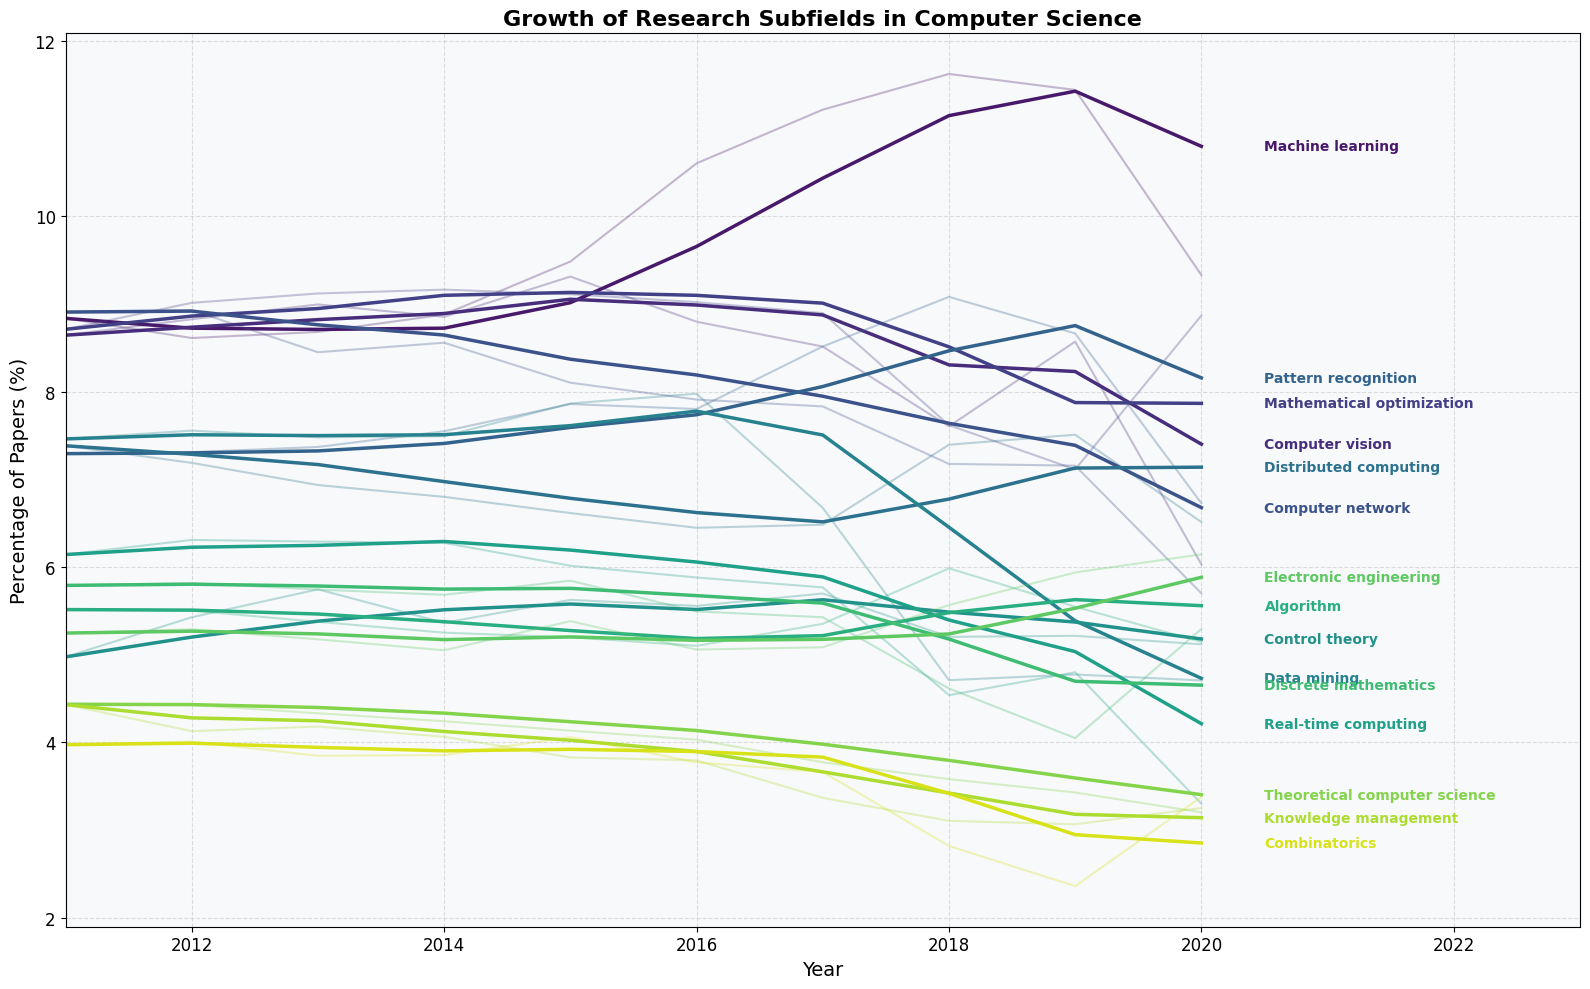

In [51]:
# Filter out overly general keywords that don't represent specific subfields
general_terms = ['Computer science', 'Computer', 'Software', 'Computing', 
                 'Information technology', 'Engineering', 'Mathematics', 'Research']

# Filter the keyword counts to exclude general terms
filtered_keyword_counts = pd.Series({k: v for k, v in keyword_counts.items() 
                                if k not in general_terms})

# Get top keywords after filtering
top_keywords = filtered_keyword_counts.head(15).index.tolist()

# Now analyze growth rates across specific subfields
subfield_growth = pd.DataFrame()
for year in sorted(df['year'].unique()):
    year_data = {'year': year}
    total_papers = df[df['year'] == year].shape[0]
    
    if total_papers > 0:  # Only process years with papers
        for keyword in top_keywords:
            clean_keyword = keyword.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").replace("–", "_")
            keyword_col = f'has_{clean_keyword}'
            
            # Count papers with this keyword in this year
            count = df[(df['year'] == year) & (df[keyword_col])].shape[0]
            # Calculate percentage of papers with this keyword
            percentage = (count / total_papers * 100)
            year_data[keyword] = percentage
        
        subfield_growth = pd.concat([subfield_growth, pd.DataFrame([year_data])], ignore_index=True)

# Filter for years with enough data
min_papers_threshold = 100  # Minimum papers per year to include
years_with_enough_data = yearly_df[yearly_df['publications'] >= min_papers_threshold]['year'].tolist()
subfield_growth_filtered = subfield_growth[subfield_growth['year'].isin(years_with_enough_data)]

# Improved visualization
plt.figure(figsize=(16, 10))

# Use a better color palette
colors = sns.color_palette("viridis", len(top_keywords))

# Apply smoothing for trend visualization
for keyword in top_keywords:
    subfield_growth_filtered[f'{keyword}_smooth'] = subfield_growth_filtered[keyword].rolling(window=3, min_periods=1).mean()

# Plot with improved styling
for i, keyword in enumerate(top_keywords):
    # Plot both the actual data (lighter) and smoothed trend (darker)
    plt.plot(subfield_growth_filtered['year'], subfield_growth_filtered[keyword], 
             alpha=0.3, color=colors[i], linewidth=1.5)
    plt.plot(subfield_growth_filtered['year'], subfield_growth_filtered[f'{keyword}_smooth'], 
             color=colors[i], linewidth=2.5)
    
    # Add label at the end of the line instead of at peaks
    # This avoids overlapping labels
    if not subfield_growth_filtered.empty:
        last_valid_idx = subfield_growth_filtered[f'{keyword}_smooth'].last_valid_index()
        if last_valid_idx is not None:
            last_year = subfield_growth_filtered.loc[last_valid_idx, 'year']
            last_val = subfield_growth_filtered.loc[last_valid_idx, f'{keyword}_smooth']
            
            # Add label at the end of the line
            plt.text(last_year + 0.5, last_val, keyword, 
                    fontsize=10, color=colors[i], 
                    fontweight='bold', ha='left', va='center')

# Enhance the plot appearance
plt.title('Growth of Research Subfields in Computer Science', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Papers (%)', fontsize=14)

# Add grid but make it subtle
plt.grid(True, linestyle='--', alpha=0.4)

# No need for a legend since we're labeling the lines directly
# plt.legend(title='Subfields', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set better tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle background color
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#ffffff')

# Add some padding to x-axis for label space
plt.xlim(subfield_growth_filtered['year'].min(), 
         subfield_growth_filtered['year'].max() + 3)

# Add a border around the plot
plt.box(True)

plt.tight_layout()
plt.show()

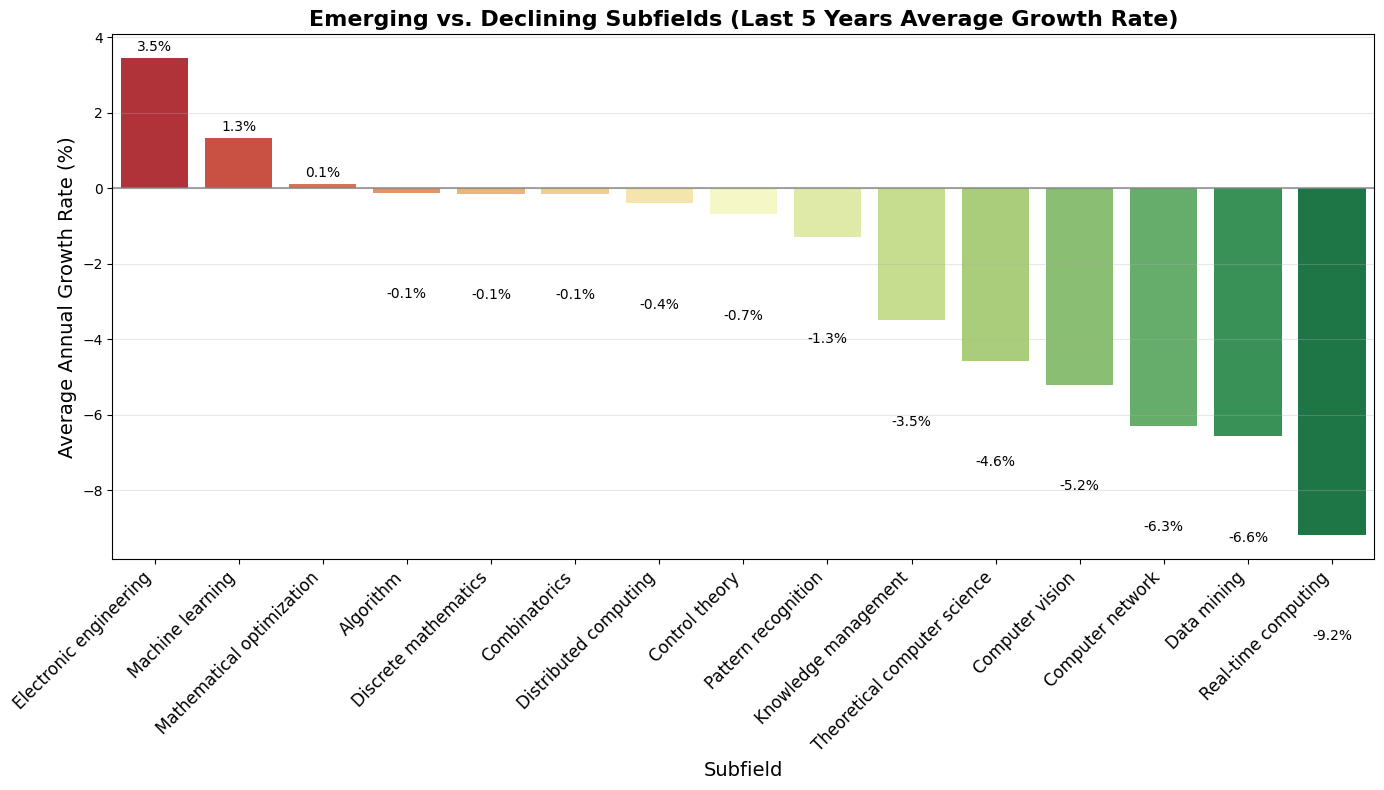

In [54]:
# 1. Calculate growth rate for each subfield
# First, ensure we have data sorted by year
subfield_growth_filtered = subfield_growth_filtered.sort_values('year')

# Calculate year-over-year growth rates
growth_rates = pd.DataFrame({'year': subfield_growth_filtered['year']})
for keyword in top_keywords:
    subfield_growth_filtered[f'{keyword}_growth'] = subfield_growth_filtered[keyword].pct_change() * 100

# 2. Identify emerging and declining subfields
# Calculate average growth rate over the last 5 years for each subfield
recent_years = subfield_growth_filtered['year'].max() - 5
recent_data = subfield_growth_filtered[subfield_growth_filtered['year'] >= recent_years]

avg_recent_growth = {}
for keyword in top_keywords:
    avg_recent_growth[keyword] = recent_data[f'{keyword}_growth'].mean()

# Convert to DataFrame and sort
growth_trends = pd.DataFrame({
    'subfield': list(avg_recent_growth.keys()),
    'avg_growth_rate': list(avg_recent_growth.values())
}).sort_values('avg_growth_rate', ascending=False)

# Visualize emerging vs declining subfields
plt.figure(figsize=(14, 8))
bars = sns.barplot(x='subfield', y='avg_growth_rate', data=growth_trends, 
                  palette=sns.color_palette("RdYlGn", len(growth_trends)))

# Add reference line at zero
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.7)

# Add labels and title
plt.title('Emerging vs. Declining Subfields (Last 5 Years Average Growth Rate)', fontsize=16, fontweight='bold')
plt.xlabel('Subfield', fontsize=14)
plt.ylabel('Average Annual Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + (0.1 if height >= 0 else -2.5),
            f'{height:.1f}%',
            ha='center', va='bottom' if height >= 0 else 'top',
            fontsize=10
        )

plt.tight_layout()
plt.show()


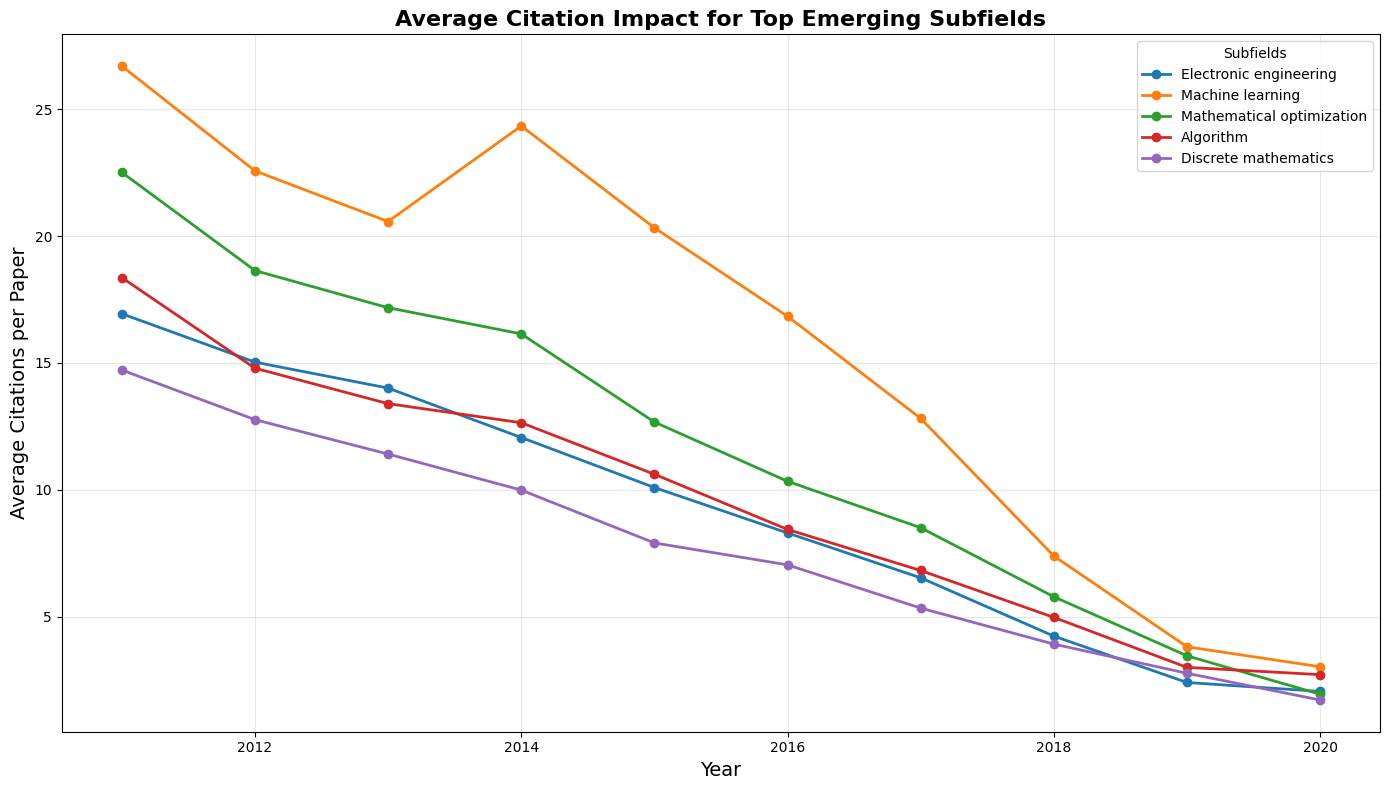

In [56]:
# 4. Analyze citation impact across subfields over time
# Get citation data for the top subfields
citation_impact = pd.DataFrame()

for year in sorted(df['year'].unique()):
    if year in years_with_enough_data:  # Only include years with sufficient data
        year_data = {'year': year}
        for keyword in top_keywords:
            clean_keyword = keyword.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").replace("–", "_")
            keyword_col = f'has_{clean_keyword}'
            
            # Get papers with this keyword in this year
            papers = df[(df['year'] == year) & (df[keyword_col])]
            if not papers.empty:
                # Calculate average citations
                avg_citations = papers['n_citation'].mean()
                # Calculate total citations
                total_citations = papers['n_citation'].sum()
                # Store both metrics
                year_data[f'{keyword}_avg_cite'] = avg_citations
                year_data[f'{keyword}_total_cite'] = total_citations
            else:
                year_data[f'{keyword}_avg_cite'] = 0
                year_data[f'{keyword}_total_cite'] = 0
        
        citation_impact = pd.concat([citation_impact, pd.DataFrame([year_data])], ignore_index=True)

# Plot citation impact (average) for top 5 subfields
top5_keywords = growth_trends.head(5)['subfield'].tolist()  # Most growing subfields

plt.figure(figsize=(14, 8))
for keyword in top5_keywords:
    plt.plot(citation_impact['year'], citation_impact[f'{keyword}_avg_cite'], 
             label=keyword, linewidth=2, marker='o')

plt.title('Average Citation Impact for Top Emerging Subfields', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Citations per Paper', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Subfields')
plt.tight_layout()
plt.show()


/tmp/ipykernel_31/796065893.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  subfield_metrics = pd.concat([subfield_metrics,


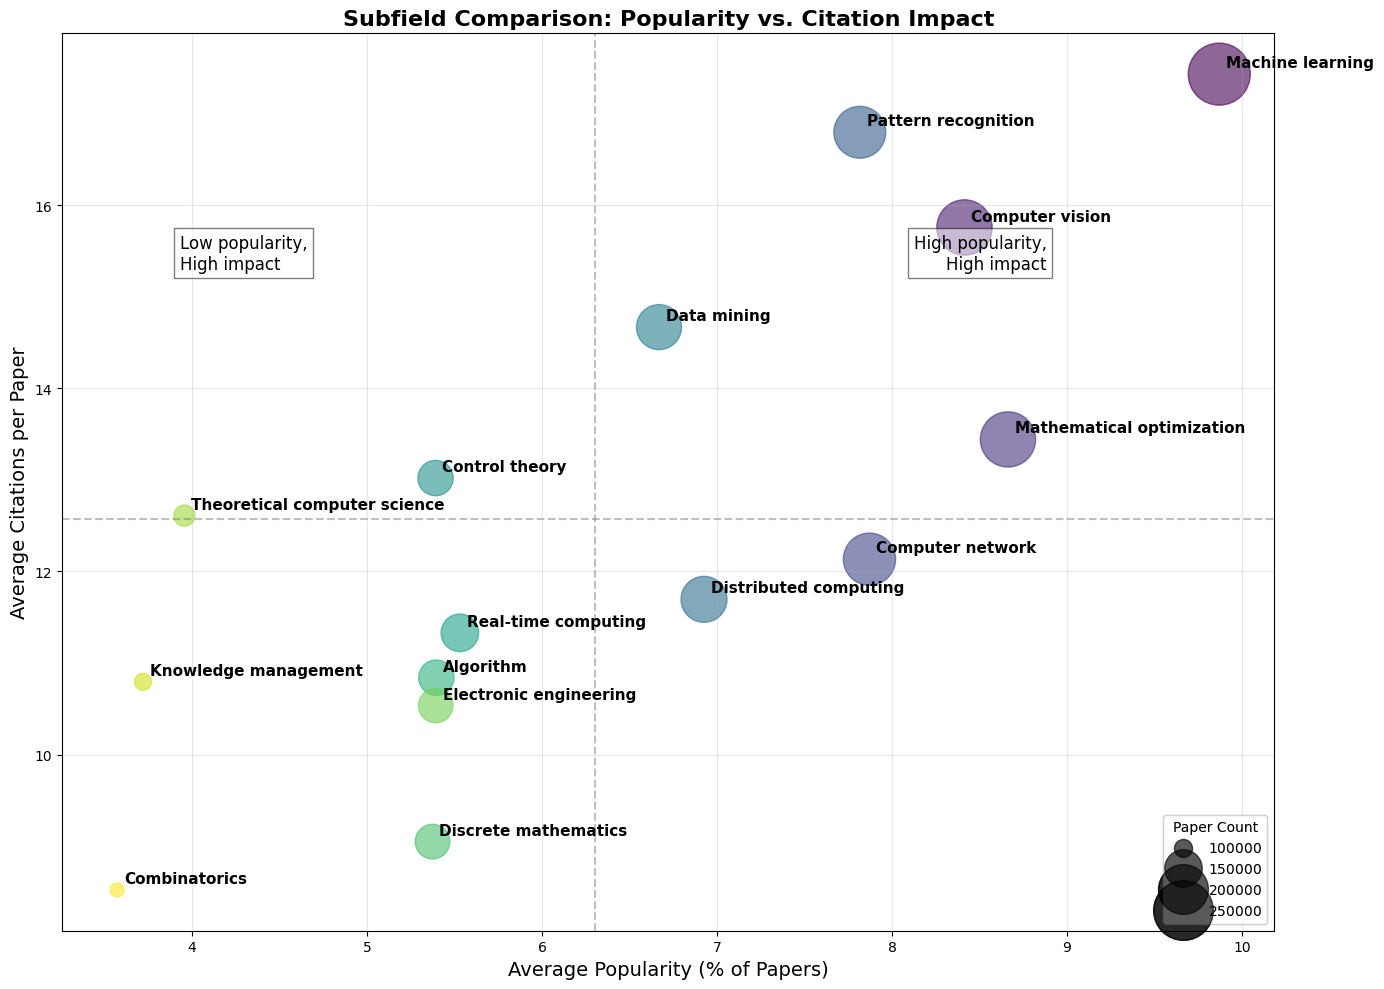

In [57]:
# 5. Combined view: Subfield popularity vs. citation impact
# Calculate average popularity and citation impact for each subfield
subfield_metrics = pd.DataFrame(columns=['subfield', 'avg_popularity', 'avg_citations', 'papers_count'])

for keyword in top_keywords:
    clean_keyword = keyword.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").replace("–", "_")
    keyword_col = f'has_{clean_keyword}'
    
    # Get average popularity (percentage of papers)
    avg_pop = subfield_growth_filtered[keyword].mean()
    
    # Get papers with this keyword
    papers = df[df[keyword_col]]
    papers_count = len(papers)
    
    # Get average citations per paper
    avg_cite = papers['n_citation'].mean() if not papers.empty else 0
    
    # Add to DataFrame
    subfield_metrics = pd.concat([subfield_metrics, 
                                  pd.DataFrame({'subfield': [keyword], 
                                                'avg_popularity': [avg_pop], 
                                                'avg_citations': [avg_cite],
                                                'papers_count': [papers_count]})], 
                                ignore_index=True)

# Create bubble chart: X = popularity, Y = citation impact, size = paper count
plt.figure(figsize=(14, 10))

# Normalize size for bubbles
min_size, max_size = 100, 2000
normalized_sizes = np.interp(subfield_metrics['papers_count'], 
                             (subfield_metrics['papers_count'].min(), subfield_metrics['papers_count'].max()), 
                             (min_size, max_size))

# Create scatter plot with varying bubble sizes
scatter = plt.scatter(subfield_metrics['avg_popularity'], 
                     subfield_metrics['avg_citations'],
                     s=normalized_sizes,
                     alpha=0.6,
                     c=range(len(subfield_metrics)),  # Color by index for variety
                     cmap='viridis')

# Add labels for each bubble
for i, row in subfield_metrics.iterrows():
    plt.annotate(row['subfield'],
                xy=(row['avg_popularity'], row['avg_citations']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=11,
                fontweight='bold')



# Add reference lines for averages
plt.axvline(x=subfield_metrics['avg_popularity'].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=subfield_metrics['avg_citations'].mean(), color='gray', linestyle='--', alpha=0.5)

# Add quadrant labels
plt.text(subfield_metrics['avg_popularity'].max()*0.9, subfield_metrics['avg_citations'].max()*0.9, 
         'High popularity,\nHigh impact', 
         fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.text(subfield_metrics['avg_popularity'].min()*1.1, subfield_metrics['avg_citations'].max()*0.9, 
         'Low popularity,\nHigh impact', 
         fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

# Add title and labels
plt.title('Subfield Comparison: Popularity vs. Citation Impact', fontsize=16, fontweight='bold')
plt.xlabel('Average Popularity (% of Papers)', fontsize=14)
plt.ylabel('Average Citations per Paper', fontsize=14)
plt.grid(True, alpha=0.3)

# Add legend for bubble size
handles, labels = plt.gca().get_legend_handles_labels()
legend1 = plt.legend(*scatter.legend_elements(prop="sizes", num=4, alpha=0.6, 
                                             func=lambda s: np.interp(s, (min_size, max_size), 
                                                                    (subfield_metrics['papers_count'].min(), 
                                                                     subfield_metrics['papers_count'].max()))),
                    loc="lower right", title="Paper Count")
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()